# Machine Learning on Text: Clustering Assignment

In [0]:
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('gutenberg')

from nltk.corpus import gutenberg

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


### Ingest the company_profiles data set into a corpus.

TypeError: ignored

### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [0]:
docs = [gutenberg.raw(fileid) for fileid in gutenberg.fileids()]

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [0]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer('english')
    preprocessed = []

    for doc in docs:
        tokenized = word_tokenize(doc)
        cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower()))
                    for token in tokenized
                    if token.lower() not in stopwords.words('english')
                    if token.isalpha()]
        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)
    return preprocessed

In [0]:
text = preprocess(docs)

### TF-IDF vectorize the preprocessed documents.

In [0]:
vectorizer = TfidfVectorizer()

vectorized = vectorizer.fit_transform(text)

### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3da6c8f7b8>,
                 k=None, metric=None, model=None, timings=True)

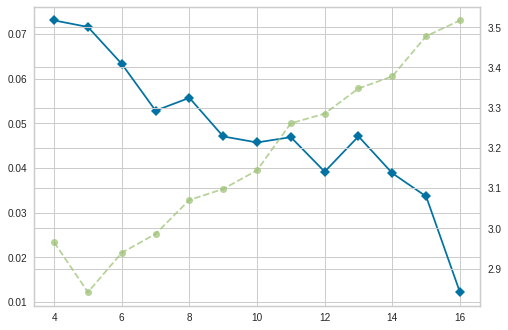

In [0]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(4,17), metric='silhouette')
visualizer.fit(vectorized)

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

In [0]:
kmn = KMeans(n_clusters=6)

clusters_kmn = model.fit_predict(vectorized)

### Perform Agglomerative Clustering using the same number of clusters.

In [0]:
agg = AgglomerativeClustering(n_clusters=6)

clusters_agg = model.fit_predict(vectorized)

### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [0]:
from sklearn.decomposition import TruncatedSVD

num_keywords = 5
num_topics = 6

model = TruncatedSVD(n_components=num_topics)
model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i]) for i in 
            topic.argsort()[:-num_keywords - 1:-1]] for topic in 
           model.components_]

topics = [[x[0] for x in i] for i in results]

In [0]:
topics

[['said', 'one', 'littl', 'like', 'man'],
 ['haue', 'thou', 'thee', 'thi', 'shall'],
 ['thee', 'thi', 'heaven', 'unto', 'thou'],
 ['elinor', 'mariann', 'emma', 'elliot', 'mr'],
 ['buster', 'littl', 'joe', 'blacki', 'farmer'],
 ['alic', 'said', 'unto', 'shall', 'lord']]

In [0]:
results

[[('said', 0.26044583554860795),
  ('one', 0.18595959691790068),
  ('littl', 0.1666524917262982),
  ('like', 0.14745804941633275),
  ('man', 0.13586002653255838)],
 [('haue', 0.30594480786431916),
  ('thou', 0.2594282716813165),
  ('thee', 0.22293910492134728),
  ('thi', 0.1993678233018269),
  ('shall', 0.1739405243364239)],
 [('thee', 0.1866992920286624),
  ('thi', 0.14270504556783778),
  ('heaven', 0.13727796612285664),
  ('unto', 0.13404400825750462),
  ('thou', 0.1310474520038076)],
 [('elinor', 0.2567916041799588),
  ('mariann', 0.18477321655621082),
  ('emma', 0.18434584459831127),
  ('elliot', 0.14791091607636142),
  ('mr', 0.1382176012528392)],
 [('buster', 0.543373020340159),
  ('littl', 0.2340047524104207),
  ('joe', 0.21794625926233294),
  ('blacki', 0.14095843516673362),
  ('farmer', 0.13916655452191726)],
 [('alic', 0.5745707718585296),
  ('said', 0.22161320304769436),
  ('unto', 0.18406662304959165),
  ('shall', 0.10173686578524921),
  ('lord', 0.09282078132041911)]]